
# Gaussian Processes (GPs) for binary classification 

In the realm of machine learning and statistical modeling, making accurate predictions about binary outcomes—is a common task. Using Bernouilli's likelihood function, Gaussian Processes (GPs) offer a powerful and flexible approach to tackling binary classification problems. This combination allows us to capture the underlying probability of a data point belonging to a particular class.

This notebook will cover:

* How to use use **twinLab** to create, train and use a Classifier GP model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import twinlab as tl


          ====== TwinLab Client Initialisation ======
          Version     : 2.10.0
          User        : sergio@digilab.co.uk
          Server      : http://127.0.0.1:8000
          Environment : /Users/sergiochavez/twinlab-tutorials/.env



Lets consider the following scenario:

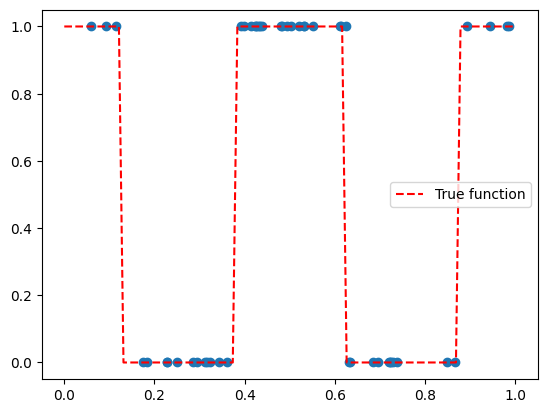

In [2]:
np.random.seed(123)

# Generate train_x
train_x = np.random.rand(50)

# Generate train_y
train_y = np.sign(np.cos(train_x * (4 * np.pi))).astype(float)
train_y = (train_y + 1) / 2

# True function
x = np.linspace(0, 1, 100)
y = np.sign(np.cos(x * (4 * np.pi))).astype(float)
y = (y + 1) / 2

df = pd.DataFrame({
    "X": train_x,
    "y": train_y
})

plt.scatter(df['X'], df['y'])
plt.plot(x, y, color='red',linestyle='dashed', label='True function')
plt.legend()
plt.show()

Now let's train a **twinLab** model that identifies the patterns underlying the data.

To do so, we will only have to specify the type of GP (***"classification_gp"***) inside **tl.EstimatorParams**. The rest of the process is the same as the one we would follow to train a standard **twinLab** model, with the one caveat that the output (*y*) takes a binary value. 

In [3]:
# Instanciate Dataset and upload data
dataset = tl.Dataset(id="classification_df")
dataset.upload(df)

# Instanciate Emulator
emulator = tl.Emulator(id="classification_emulator")

# Train Emulator
estimator_params = tl.EstimatorParams(estimator_type="classification_gp") # Specify the "classification_gp" estimator
params = tl.TrainParams(estimator_params=estimator_params)
emulator.train(dataset=dataset, inputs=["X"], outputs=["y"], params=params)

Emulator classification_emulator has begun training.
0:00:00: Job status: processing
0:00:01: Job status: processing
0:00:03: Job status: processing
0:00:05: Job status: processing
0:00:08: Job status: success
Training of emulator classification_emulator is complete!


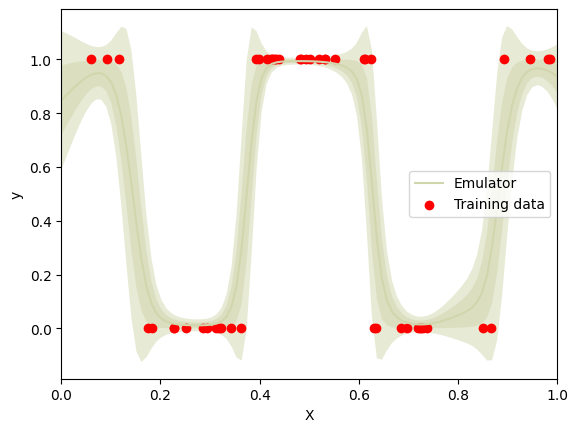

In [4]:
# Plot emulator to see how well it fits the data
emulator.plot(x_axis="X", y_axis="y", x_lim=(0, 1), color="#D1D6AD")
plt.scatter(df['X'], df['y'], label="Training data", color="red")
plt.legend()
plt.show()

Now, lets use the trained emulator to classify new incoming data. The process of running predict is exactly the same as the one we would follow for a standard **twinlab** emulator

In [5]:
# Generate test_x
np.random.seed(5)
eval_x = np.random.rand(10)
eval_df = pd.DataFrame({
    "X": eval_x,
})

# Classify incoming data using the trained emulator
classification_mean, classification_std= emulator.predict(eval_df, verbose=False)

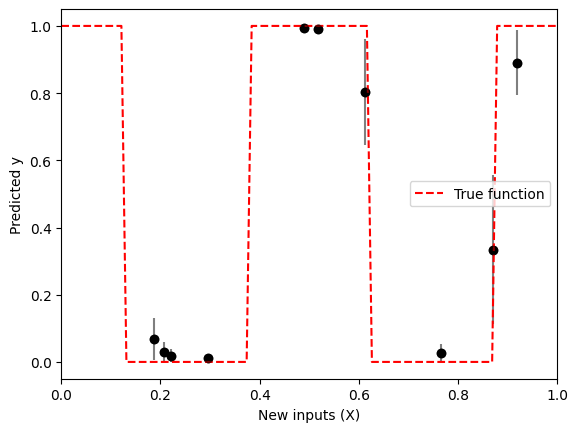

In [6]:
# Include the classification mean and std in the eval_df
eval_df["classification_mean"] = classification_mean
eval_df["classification_std"] = classification_std

# Plot the classification mean and std
plt.scatter(eval_df["X"], eval_df["classification_mean"], color="black")
plt.errorbar(eval_df['X'], eval_df['classification_mean'], yerr=eval_df['classification_std'], fmt='o', color="black", alpha=0.5)
plt.plot(x, y, color='red',linestyle='dashed', label='True function')
plt.ylabel("Predicted y")
plt.xlabel("New inputs (X)")
plt.legend()
plt.xlim(0, 1)
plt.show()

The plot shows that the predicted probabilities match very accurately the classification given by the underlying function. 

In [7]:
# Delete emulator and dataset
emulator.delete()
dataset.delete()